<a href="https://colab.research.google.com/github/AnshHarjai/Sentiment-Analysis-in-HealthCare/blob/main/Sentiment_Analysis_Drugs(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = "/content/drive/MyDrive/ucl_ml/drugsComTrain_raw.csv"
test = "/content/drive/MyDrive/ucl_ml/drugsComTest_raw.csv"
df1 = pd.read_csv(train)
df2 = pd.read_csv(test)

df = pd.concat([df1, df2])
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
print ("Null values in the dataset : ", df.isnull().sum(axis = 0))

Null values in the dataset :  uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64


# **PREPROCESSING**

In [ ]:
# how = 'any' removes row in which any one column has a null value
df_data = df.dropna(how = 'any', axis = 0)
#df_data.columns = df_data.columns.str.lower()


In [ ]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
print(df_data['condition'].nunique(), "\n")

916 



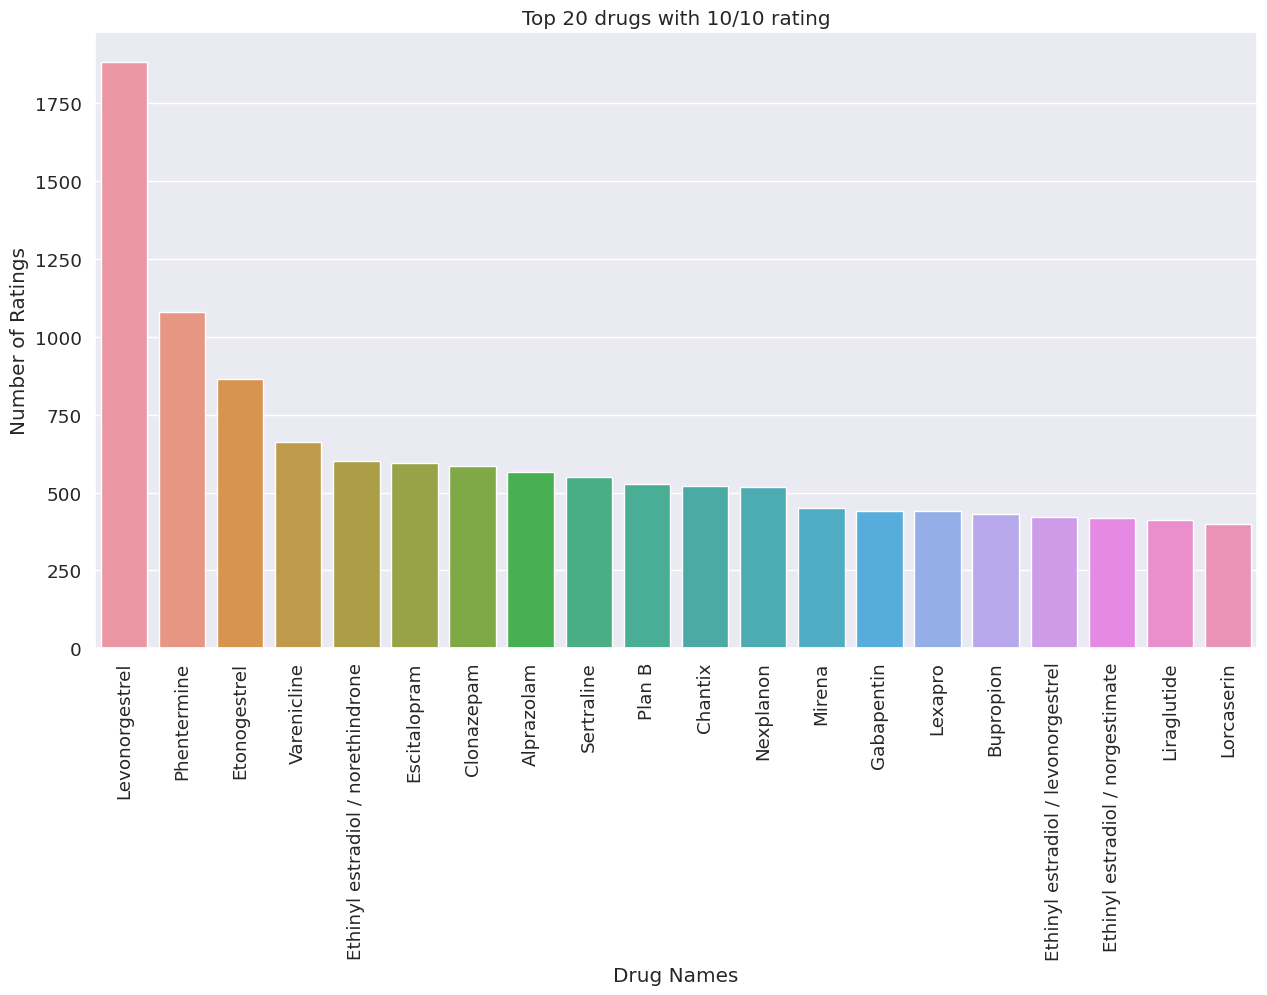

In [ ]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set(title = 'Top 20 drugs with 10/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

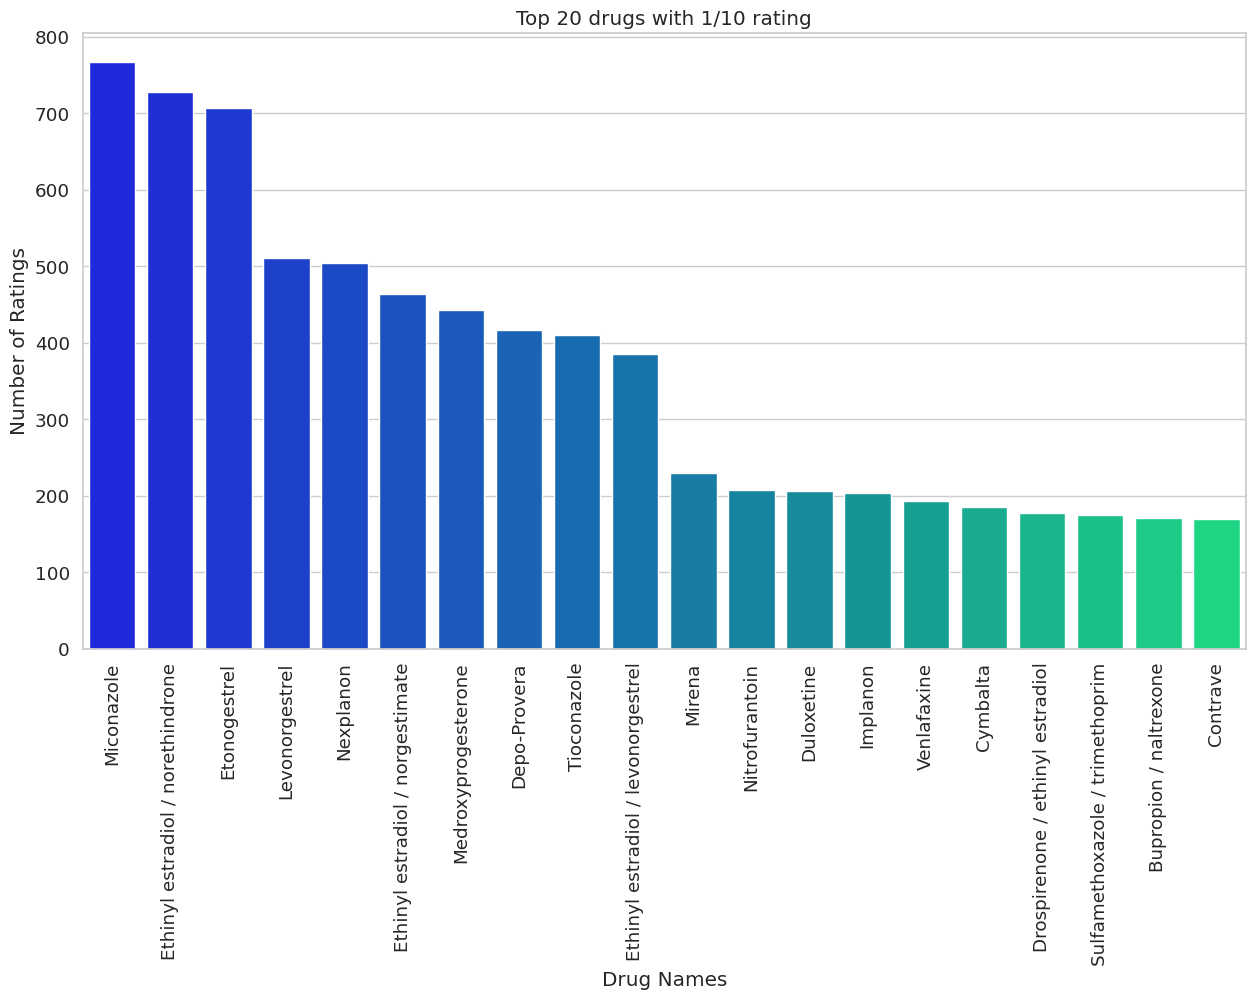

In [ ]:
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set(title = 'Top 20 drugs with 1/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")

plt.setp(sns_rating.get_xticklabels(), rotation=90);

In [ ]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stops = set(stopwords.words('english'))

In [ ]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

In [ ]:
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [ ]:
df_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
df_data['review_clean'] = df_data['review'].apply(review_to_words)

<ipython-input-13-c92ea89fce1d>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
<ipython-input-15-8f99c692ba0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['review_clean'] = df_data['review'].apply(review_to_words)


In [ ]:
df_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,no side effect take combin bystol mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,use take anoth oral contracept pill cycl happi...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,first time use form birth control glad went pa...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,suboxon complet turn life around feel healthie...


# **LSTM**

if rating > 5 positive Sentiment(1)
else negetive Sentiment (0)

In [ ]:
df_data['sentiment'] = df_data["rating"].apply(lambda x: 1 if x > 5 else 0)

<ipython-input-17-9c021d26ddfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['sentiment'] = df_data["rating"].apply(lambda x: 1 if x > 5 else 0)


In [ ]:
from sklearn.preprocessing import LabelEncoder
reviews = df_data['review'].values
labels = df_data['sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [ ]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [ ]:
from keras.preprocessing.text import Tokenizer

# Instantiate a Tokenizer object
tokenizer = Tokenizer()

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(df_data['review'])

# Get the size of the resulting vocabulary
vocab_size = len(tokenizer.word_index) + 1

# Convert the text data to sequences
sequences = tokenizer.texts_to_sequences(df_data['review'])

# Get the maximum sequence length
max_length = max(len(seq) for seq in sequences)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

#vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
#max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2034, 100)         5523200   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,610,801
Trainable params: 5,610,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf

print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Training on GPU...


In [ ]:
num_epochs = 10
history = model.fit(train_padded, train_labels,
                    epochs=num_epochs, verbose=1,
                    validation_split=0.1)

Epoch 1/10
4512/4512 [==============================] - 627s 136ms/step - loss: 0.3984 - accuracy: 0.8229 - val_loss: 0.3626 - val_accuracy: 0.8540
Epoch 2/10
4512/4512 [==============================] - 527s 117ms/step - loss: 0.2847 - accuracy: 0.8833 - val_loss: 0.2998 - val_accuracy: 0.8814
Epoch 3/10
4512/4512 [==============================] - 501s 111ms/step - loss: 0.2193 - accuracy: 0.9134 - val_loss: 0.2730 - val_accuracy: 0.8913
Epoch 4/10
4512/4512 [==============================] - 520s 115ms/step - loss: 0.1672 - accuracy: 0.9358 - val_loss: 0.2803 - val_accuracy: 0.8985
Epoch 5/10
4512/4512 [==============================] - 499s 110ms/step - loss: 0.1268 - accuracy: 0.9530 - val_loss: 0.2851 - val_accuracy: 0.9100
Epoch 6/10
4512/4512 [==============================] - 499s 111ms/step - loss: 0.0935 - accuracy: 0.9655 - val_loss: 0.2978 - val_accuracy: 0.9092
Epoch 7/10
4512/4512 [==============================] - 517s 114ms/step - loss: 0.0719 - accuracy: 0.9739 - val_

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))



1671/1671 [==============================] - 73s 44ms/step
Accuracy of prediction on test set :  0.9187551432632602


In [ ]:
from sklearn.metrics import classification_report

# Predict the class probabilities for the test set
y_pred_proba = model.predict(test_padded)

# Convert the class probabilities to class labels (0 or 1)
y_pred = (y_pred_proba > 0.5).astype(int)

# Generate the classification report
report = classification_report(test_labels, y_pred)

# Print the report
print(report)

1671/1671 [==============================] - 72s 43ms/step
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     15977
           1       0.93      0.95      0.94     37491

    accuracy                           0.92     53468
   macro avg       0.91      0.90      0.90     53468
weighted avg       0.92      0.92      0.92     53468



In [ ]:
model.save('/content/drive/MyDrive/ucl_ml/Drugs_LSTM.h5')


In [ ]:
# To Load The Model

#from google.colab import files
#files.download('/content/drive/MyDrive/ucl_ml/Drugs_LSTM.h5')

# from keras.models import load_model

# # Load the saved model
# model = load_model('/content/drive/MyDrive/ucl_ml/Drugs_LSTM.h5')
